In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import  mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [2]:
confirmed_cases = pd.read_excel(r"C:\Users\panka\Desktop\DS Project\Covid 19 prediction\covid 19 prediction datasets 11nov\covid19confirmed.xlsx")
deaths_reported = pd.read_excel(r"C:\Users\panka\Desktop\DS Project\Covid 19 prediction\covid 19 prediction datasets 11nov\covid19deaths.xlsx")
recovered_cases = pd.read_excel(r"C:\Users\panka\Desktop\DS Project\Covid 19 prediction\covid 19 prediction datasets 11nov\covid19recovered.xlsx")

In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857


In [4]:
recovered_cases.head(80)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,18,18,29,32,32,32,32,32,40,43
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,116,131,154,165,182,197,217,232,248,251
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,90,113,237,347,405,460,591,601,691,708
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,31,39,52,58,71,71,128,128,128,169
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,4,4,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Yunnan,China,24.97400,101.487000,0,0,0,0,0,0,...,172,173,173,173,173,174,174,174,175,176
76,Zhejiang,China,29.18320,120.093400,0,0,1,1,1,1,...,1230,1230,1232,1235,1235,1236,1238,1239,1242,1244
77,NaN,Colombia,4.57090,-74.297300,0,0,0,0,0,0,...,88,100,123,174,197,214,270,319,354,452
78,NaN,Comoros,-11.64550,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7281,7284,7284,7284,7284,7284,7288,7290,7291,7292
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2937,2940,2944,2948,2948,2955,2966,2970,2975,2978
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5927,5931,5936,5939,5941,5945,5950,5954,5960,5966
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1713,1716,1718,1719,1719,1720,1721,1723,1723,1725


In [6]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '11/2/21', '11/3/21', '11/4/21', '11/5/21', '11/6/21', '11/7/21',
       '11/8/21', '11/9/21', '11/10/21', '11/11/21'],
      dtype='object', length=664)

In [7]:
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21
0,0,0,0,0,0,0,0,0,0,0,...,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456
1,0,0,0,0,0,0,0,0,0,0,...,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440
2,0,0,0,0,0,0,0,0,0,0,...,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624
3,0,0,0,0,0,0,0,0,0,0,...,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744
4,0,0,0,0,0,0,0,0,0,0,...,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857


In [8]:
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21
0,0,0,0,0,0,0,0,0,0,0,...,7281,7284,7284,7284,7284,7284,7288,7290,7291,7292
1,0,0,0,0,0,0,0,0,0,0,...,2937,2940,2944,2948,2948,2955,2966,2970,2975,2978
2,0,0,0,0,0,0,0,0,0,0,...,5927,5931,5936,5939,5941,5945,5950,5954,5960,5966
3,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,0,0,0,0,0,0,0,0,0,0,...,1713,1716,1718,1719,1719,1720,1721,1723,1723,1725


In [9]:
recovered = recovered_cases.loc[:, cols[4]:cols[-1]]
recovered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21
0,0,0,0,0,0,0,0,0,0,0,...,18,18,29,32,32,32,32,32,40,43
1,0,0,0,0,0,0,0,0,0,0,...,116,131,154,165,182,197,217,232,248,251
2,0,0,0,0,0,0,0,0,0,0,...,90,113,237,347,405,460,591,601,691,708
3,0,0,0,0,0,0,0,0,0,0,...,31,39,52,58,71,71,128,128,128,169
4,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,4,4,4,5,5


In [10]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    deaths_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(deaths_sum)
    mortality_rate.append(deaths_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [11]:
confirmed_sum

251941758

In [12]:
deaths_sum

5079990

In [13]:
recovered_sum

510236

In [14]:
world_cases

[557,
 655,
 941,
 1434,
 2118,
 2927,
 5578,
 6167,
 8235,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30805,
 34399,
 37130,
 40161,
 42769,
 44811,
 45229,
 60381,
 66909,
 69052,
 71235,
 73270,
 75152,
 75652,
 76212,
 76841,
 78602,
 78982,
 79550,
 80404,
 81381,
 82740,
 84128,
 86022,
 88400,
 90379,
 92980,
 95282,
 98100,
 102016,
 106113,
 110051,
 114230,
 119055,
 126717,
 132519,
 146875,
 157974,
 169251,
 184036,
 200039,
 219595,
 246703,
 277579,
 309721,
 344828,
 387489,
 428574,
 479663,
 542525,
 607435,
 677100,
 734000,
 799279,
 876098,
 959098,
 1042125,
 1126354,
 1185448,
 1256304,
 1330214,
 1399820,
 1483141,
 1570148,
 1655435,
 1729826,
 1849398,
 1920451,
 2004358,
 2082579,
 2178265,
 2266304,
 2343476,
 2420251,
 2495799,
 2571855,
 2653237,
 2737236,
 2821351,
 2903702,
 2975269,
 3045516,
 3121395,
 3198420,
 3281838,
 3370331,
 3449555,
 3524163,
 3601970,
 3682239,
 3772618,
 3861580,
 3952146,
 4036436,
 4112034,
 4188342,
 4272823,
 4357832

In [15]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [16]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [17]:
world_cases

array([[      557],
       [      655],
       [      941],
       [     1434],
       [     2118],
       [     2927],
       [     5578],
       [     6167],
       [     8235],
       [     9927],
       [    12038],
       [    16787],
       [    19887],
       [    23898],
       [    27643],
       [    30805],
       [    34399],
       [    37130],
       [    40161],
       [    42769],
       [    44811],
       [    45229],
       [    60381],
       [    66909],
       [    69052],
       [    71235],
       [    73270],
       [    75152],
       [    75652],
       [    76212],
       [    76841],
       [    78602],
       [    78982],
       [    79550],
       [    80404],
       [    81381],
       [    82740],
       [    84128],
       [    86022],
       [    88400],
       [    90379],
       [    92980],
       [    95282],
       [    98100],
       [   102016],
       [   106113],
       [   110051],
       [   114230],
       [   119055],
       [   126717],


In [18]:
total_deaths

array([[     17],
       [     18],
       [     26],
       [     42],
       [     56],
       [     82],
       [    131],
       [    133],
       [    171],
       [    213],
       [    259],
       [    362],
       [    426],
       [    492],
       [    564],
       [    634],
       [    719],
       [    806],
       [    906],
       [   1013],
       [   1113],
       [   1118],
       [   1371],
       [   1523],
       [   1666],
       [   1770],
       [   1868],
       [   2008],
       [   2123],
       [   2248],
       [   2252],
       [   2459],
       [   2470],
       [   2630],
       [   2710],
       [   2771],
       [   2814],
       [   2873],
       [   2943],
       [   2997],
       [   3086],
       [   3160],
       [   3255],
       [   3348],
       [   3461],
       [   3565],
       [   3805],
       [   3995],
       [   4271],
       [   4616],
       [   4925],
       [   5417],
       [   5838],
       [   6488],
       [   7175],
       [  

In [19]:
total_recovered

array([[       30],
       [       32],
       [       39],
       [       42],
       [       56],
       [       65],
       [      108],
       [      127],
       [      145],
       [      225],
       [      287],
       [      476],
       [      627],
       [      857],
       [     1130],
       [     1493],
       [     2016],
       [     2617],
       [     3247],
       [     3949],
       [     4684],
       [     5151],
       [     6294],
       [     8061],
       [     9397],
       [    10867],
       [    12587],
       [    14352],
       [    16123],
       [    18181],
       [    18894],
       [    22892],
       [    23397],
       [    25229],
       [    27907],
       [    30388],
       [    33282],
       [    36714],
       [    39785],
       [    42721],
       [    45605],
       [    48227],
       [    51170],
       [    53796],
       [    55864],
       [    58358],
       [    60695],
       [    62495],
       [    64402],
       [    66999],


In [20]:
days_in_future = 10
future_forecast = np.array([i for i in range (len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

In [21]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [22]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [23]:
latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recovered = recovered_cases[dates[-1]]

In [24]:
latest_confirmed

0       156456
1       191440
2       207624
3        15744
4        64857
        ...   
275    1000897
276     456407
277       9907
278     209953
279     133329
Name: 11/11/21, Length: 280, dtype: int64

In [25]:
latest_deaths

0       7292
1       2978
2       5966
3        130
4       1725
       ...  
275    22849
276     4737
277     1920
278     3664
279     4694
Name: 11/11/21, Length: 280, dtype: int64

In [26]:
latest_recovered

0       43
1      251
2      708
3      169
4        5
      ... 
260    171
261     63
262      0
263     30
264      1
Name: 11/11/21, Length: 265, dtype: int64

In [27]:
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [28]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key = operator.itemgetter(1), reverse=True)]
for i in range (len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [29]:
print('Confirmed Cases by Countries/Regions:')
for i in range (len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
US: 46852276 cases
India: 34414186 cases
Brazil: 21924598 cases
United Kingdom: 9495395 cases
Russia: 8804297 cases
Turkey: 8342292 cases
France: 7358920 cases
Iran: 6019947 cases
Argentina: 5302445 cases
Spain: 5042803 cases
Colombia: 5024263 cases
Germany: 4957374 cases
Italy: 4835435 cases
Indonesia: 4249758 cases
Mexico: 3838308 cases
Ukraine: 3303694 cases
Poland: 3162804 cases
South Africa: 2924978 cases
Philippines: 2811248 cases
Malaysia: 2528821 cases
Netherlands: 2293385 cases
Peru: 2211366 cases
Iraq: 2066905 cases
Thailand: 1996969 cases
Czechia: 1856555 cases
Canada: 1749800 cases
Romania: 1730433 cases
Japan: 1724379 cases
Chile: 1718085 cases
Bangladesh: 1571906 cases
Belgium: 1463548 cases
Israel: 1336174 cases
Pakistan: 1279142 cases
Serbia: 1201080 cases
Sweden: 1181532 cases
Portugal: 1102438 cases
Kazakhstan: 1035051 cases
Vietnam: 1000897 cases
Cuba: 957735 cases
Morocco: 947902 cases
Hungary: 931414 cases
Austria: 923150 cases

In [30]:
unique_provinces = list (confirmed_cases['Province/State'].unique())

In [31]:
province_confirmed_cases = []
no_cases = []
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_provinces.remove(i)

In [32]:
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Australian Capital Territory: 1917 cases
New South Wales: 77951 cases
Northern Territory: 231 cases
Queensland: 2109 cases
South Australia: 918 cases
Tasmania: 237 cases
Victoria: 102566 cases
Western Australia: 1112 cases
Alberta: 328189 cases
British Columbia: 210758 cases
Grand Princess: 13 cases
Manitoba: 65017 cases
New Brunswick: 7004 cases
Newfoundland and Labrador: 2019 cases
Northwest Territories: 1951 cases
Nova Scotia: 7746 cases
Nunavut: 674 cases
Ontario: 613453 cases
Prince Edward Island: 324 cases
Quebec: 432274 cases
Repatriated Travellers: 13 cases
Saskatchewan: 79212 cases
Yukon: 1153 cases
Anhui: 1008 cases
Beijing: 1183 cases
Chongqing: 610 cases
Fujian: 1315 cases
Gansu: 344 cases
Guangdong: 3251 cases
Guangxi: 360 cases
Guizhou: 159 cases
Hainan: 190 cases
Hebei: 1445 cases
Heilongjiang: 1984 cases
Henan: 1628 cases
Hong Kong: 12377 cases
Hubei: 68311 cases
Hunan: 1197 cases
Inner Mongolia: 614 cases
Jiangsu: 1603 cases
Jiangxi: 954 cases
Jilin: 581 cases
Liaoning

In [33]:
nan_indices = []

for i in range (len(unique_provinces)):
    if type (unique_provinces[i]) == float:
        nan_indices.append()
        
        
unique_provinces = list (unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

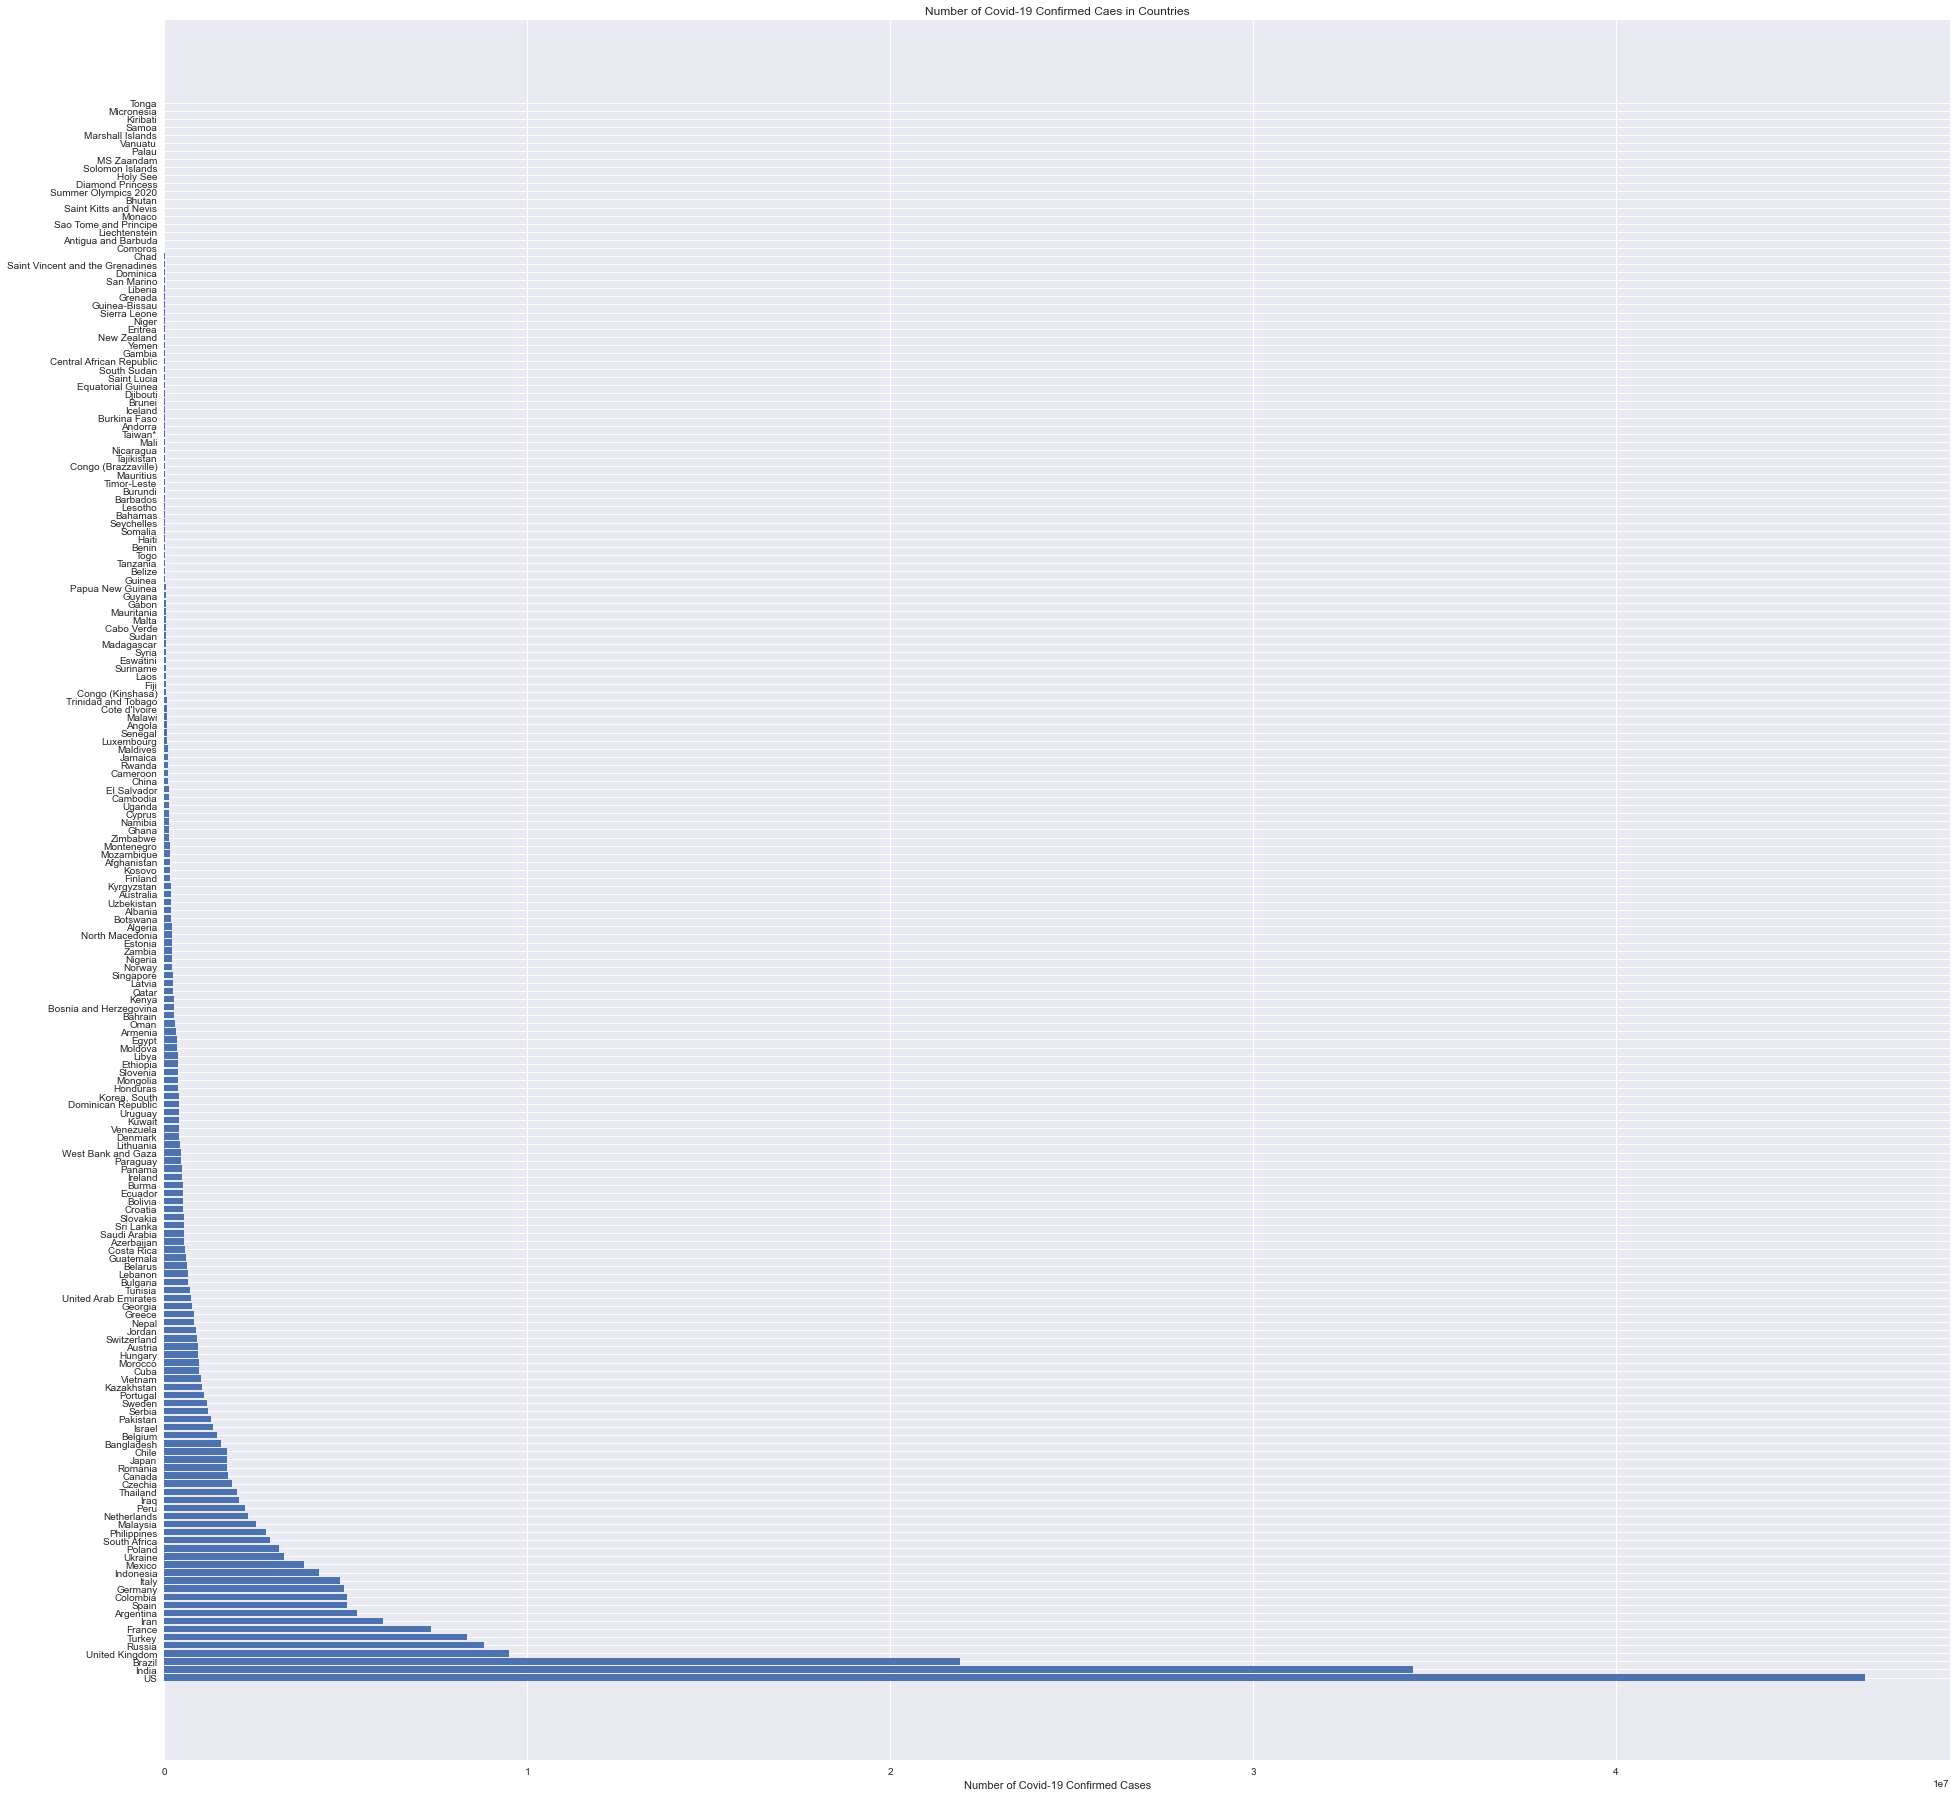

In [34]:
plt.figure(figsize=(32,32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Caes in Countries')
plt.xlabel('Number of Covid-19 Confirmed Cases')
plt.show()

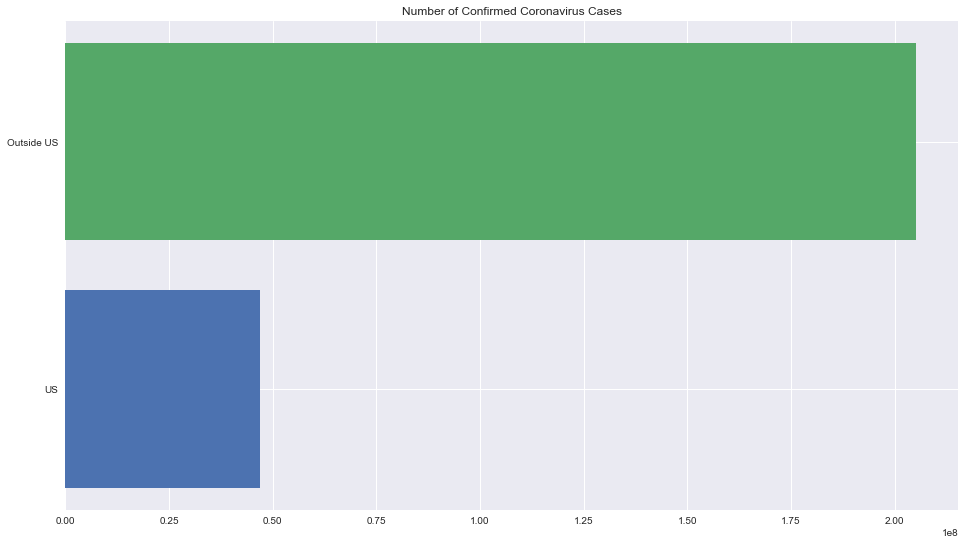

In [35]:
US_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='US'].sum()
outside_US_confirmed = np.sum(country_confirmed_cases) - US_confirmed
plt.figure(figsize=(16,9))
plt.barh('US', US_confirmed)
plt.barh('Outside US', outside_US_confirmed)
plt.title('Number of Confirmed Coronavirus Cases')
plt.show()

In [36]:
print('Outside US: {} cases' .format(outside_US_confirmed))
print('US: {} cases' .format(US_confirmed))
print('Total: {} cases' .format(US_confirmed + outside_US_confirmed))

Outside US: 205089482 cases
US: 46852276 cases
Total: 251941758 cases


In [37]:
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[:10])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

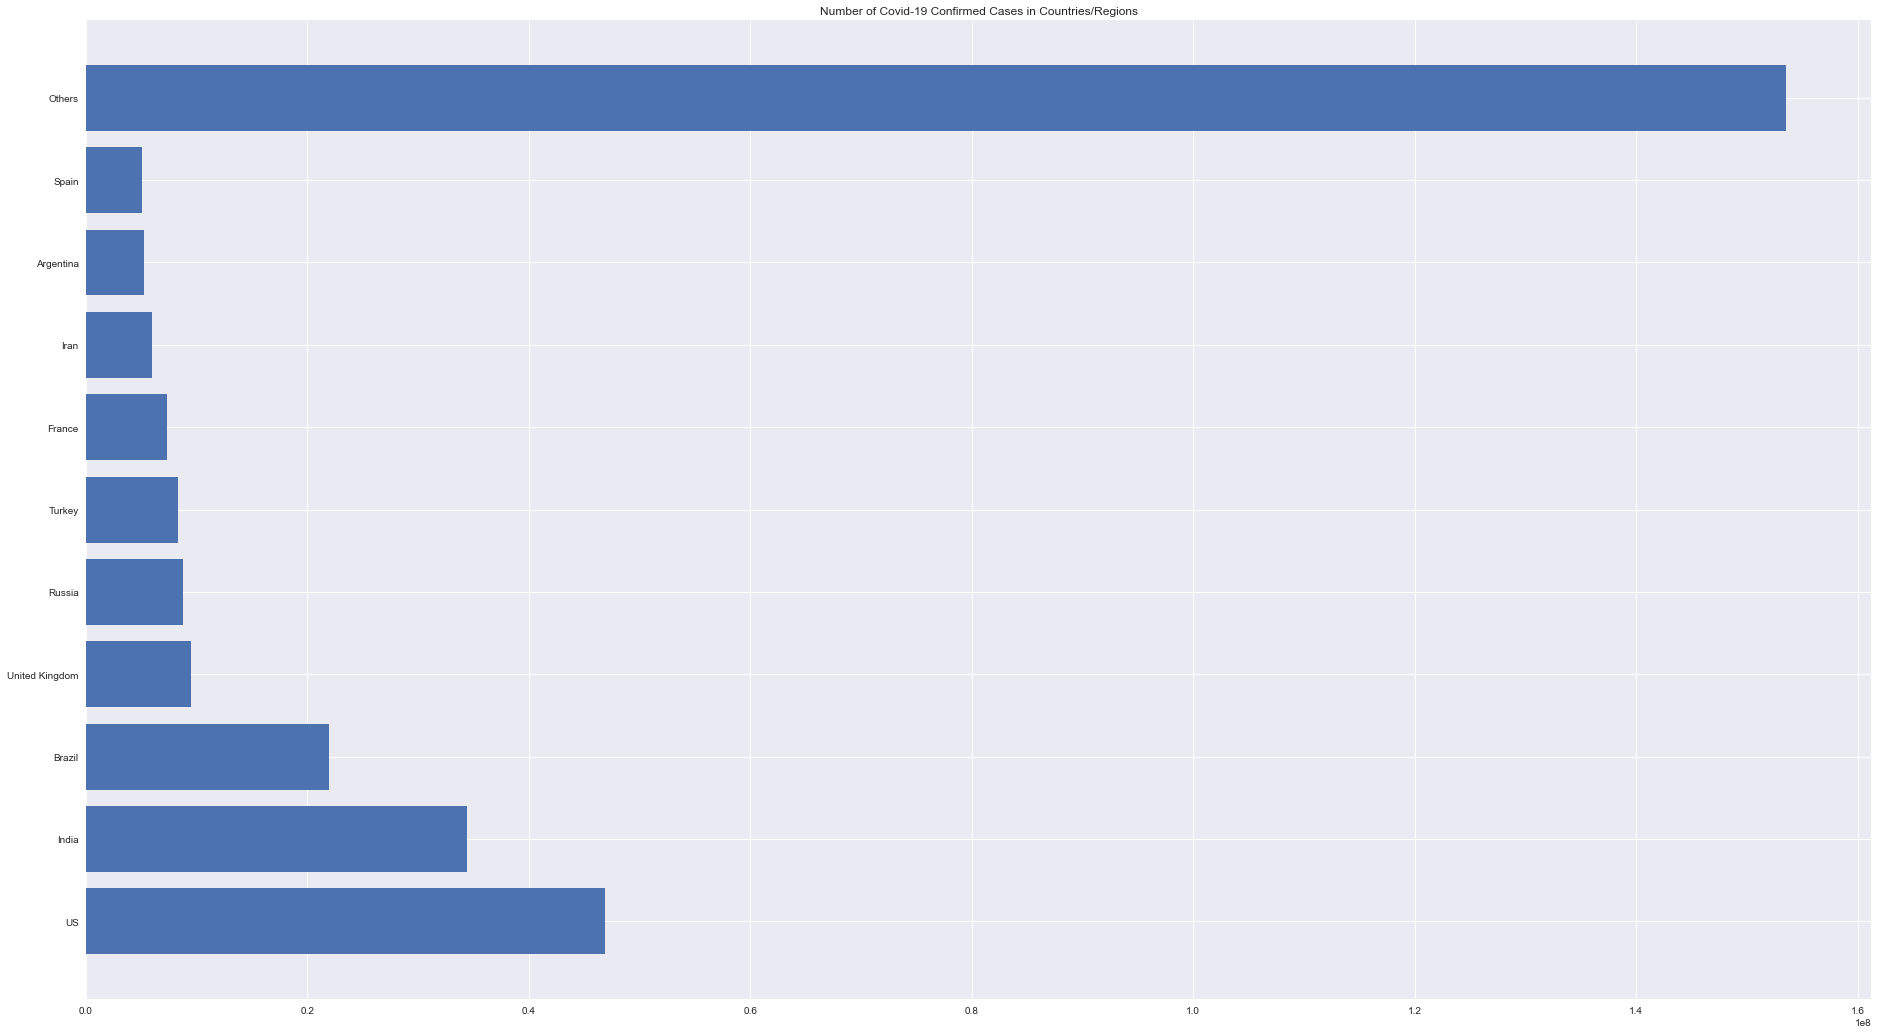

In [38]:
plt.figure(figsize=(32,18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions')
plt.show()

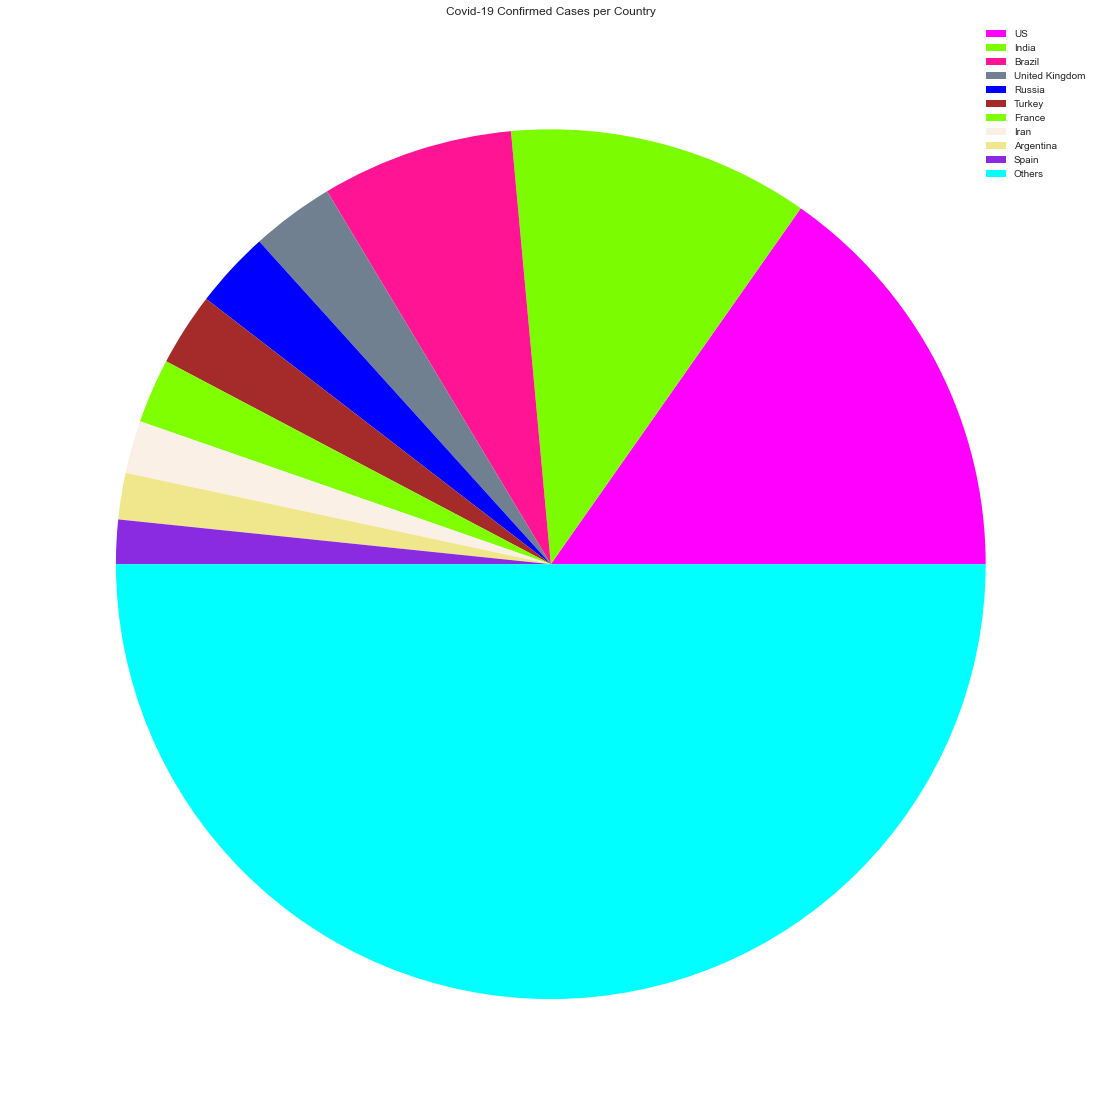

In [39]:
c = random.choices(list(mcolors.CSS4_COLORS.values()), k=len(unique_countries))
plt.figure(figsize=(20, 20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()


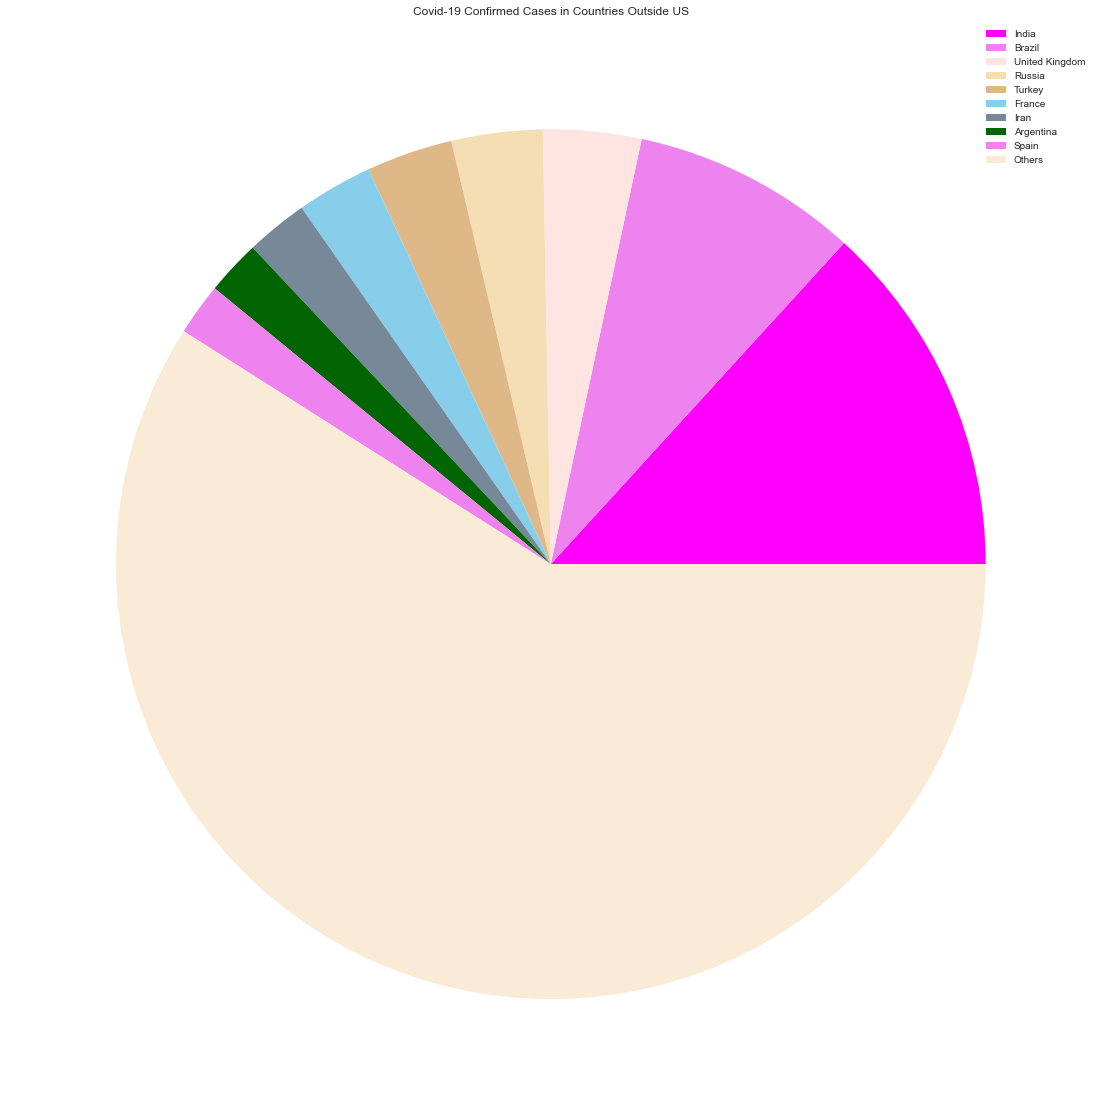

In [40]:
c=random.choices(list(mcolors.CSS4_COLORS.values()), k =len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases in Countries Outside US')
plt.pie(visual_confirmed_cases[1:], colors=c)
plt.legend(visual_unique_countries[1:], loc='best')
plt.show()           

In [41]:
kernel= ['poly', 'sigmoid', 'rbf']
c=[0.01,0.1,1,10]
gamma=[0.01,0.1,1]
epsilon=[0.01,0.1,1]
shrinking=[True,False]
svm_grid={'kernel':kernel,'C':c,'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}
svm=SVR()
svm_search=RandomizedSearchCV(svm,svm_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,n_iter=1,verbose=1)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.36, shuffle=False)
svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=1, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [74]:
svm_search.best_params

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params'

In [58]:
svm_confirmed=svm_search.best_estimator_
svm_pred=svm_confirmed.predict(future_forecast)

In [59]:
svm_confirmed

SVR(C=1, epsilon=1, gamma=0.1, kernel='sigmoid', shrinking=False)

In [60]:
svm_pred

array([22572457.        , 22572464.43980792, 22572460.98242496,
       22572459.83556694, 22572459.2663849 , 22572458.92832703,
       22572458.70589573, 22572458.54961605, 22572458.43477783,
       22572458.34767639, 22572458.28009922, 22572458.22681388,
       22572458.18431155, 22572458.15013432, 22572458.12249558,
       22572458.10005672, 22572458.08179025, 22572458.06689291,
       22572458.05472799, 22572458.04478585, 22572458.03665564,
       22572458.03000454, 22572458.02456204, 22572458.02010771,
       22572458.01646172, 22572458.01347711, 22572458.0110338 ,
       22572458.00903353, 22572458.00739593, 22572458.00605522,
       22572458.00495756, 22572458.00405889, 22572458.00332313,
       22572458.00272075, 22572458.00222756, 22572458.00182377,
       22572458.00149317, 22572458.00122251, 22572458.0010009 ,
       22572458.00081947, 22572458.00067092, 22572458.00054931,
       22572458.00044974, 22572458.00036821, 22572458.00030147,
       22572458.00024682, 22572458.00020

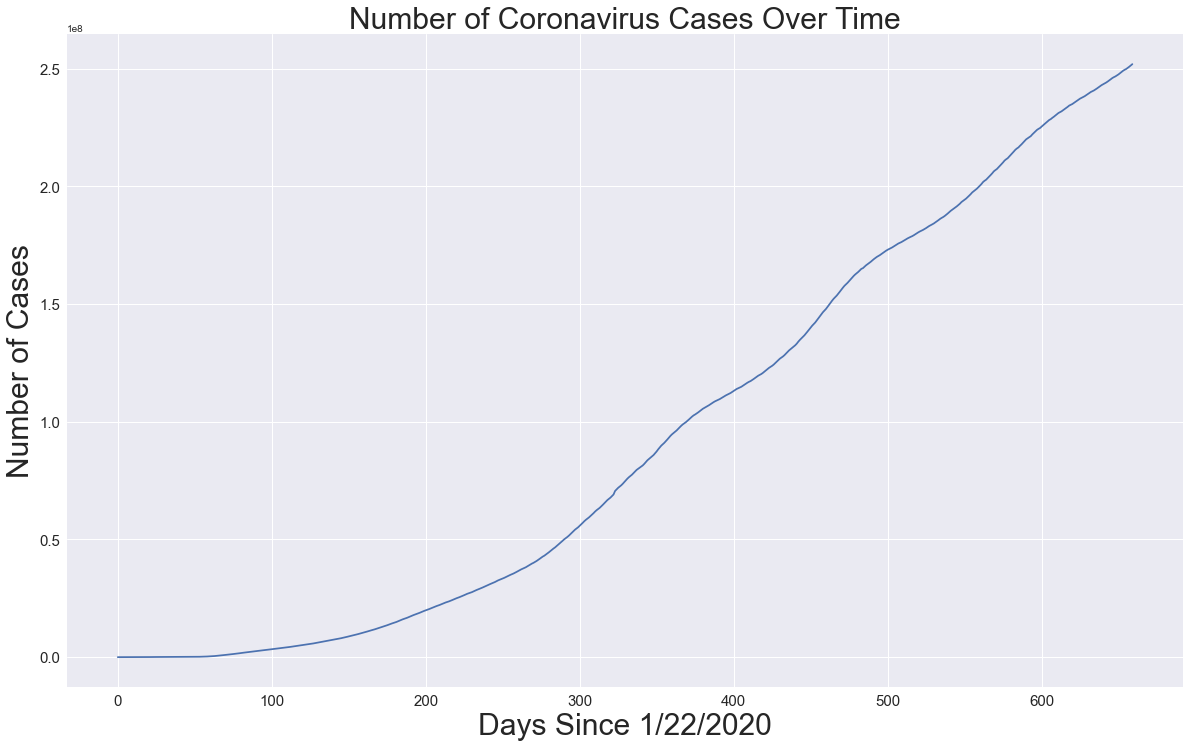

In [63]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

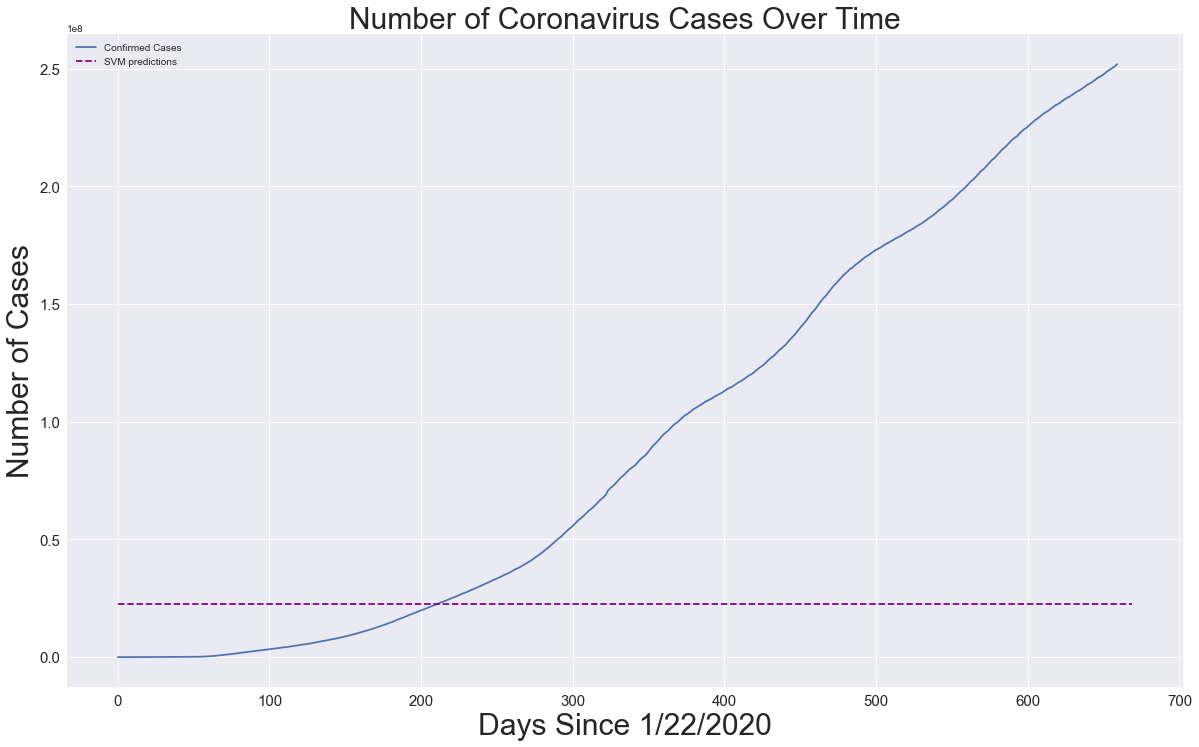

In [65]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

MAE: 55013313.87916679
MSE: 3309918085985775.5


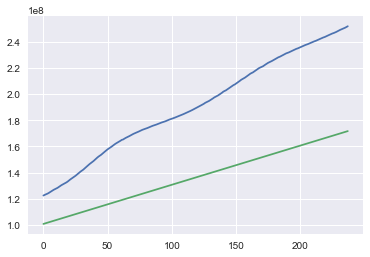

In [66]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)


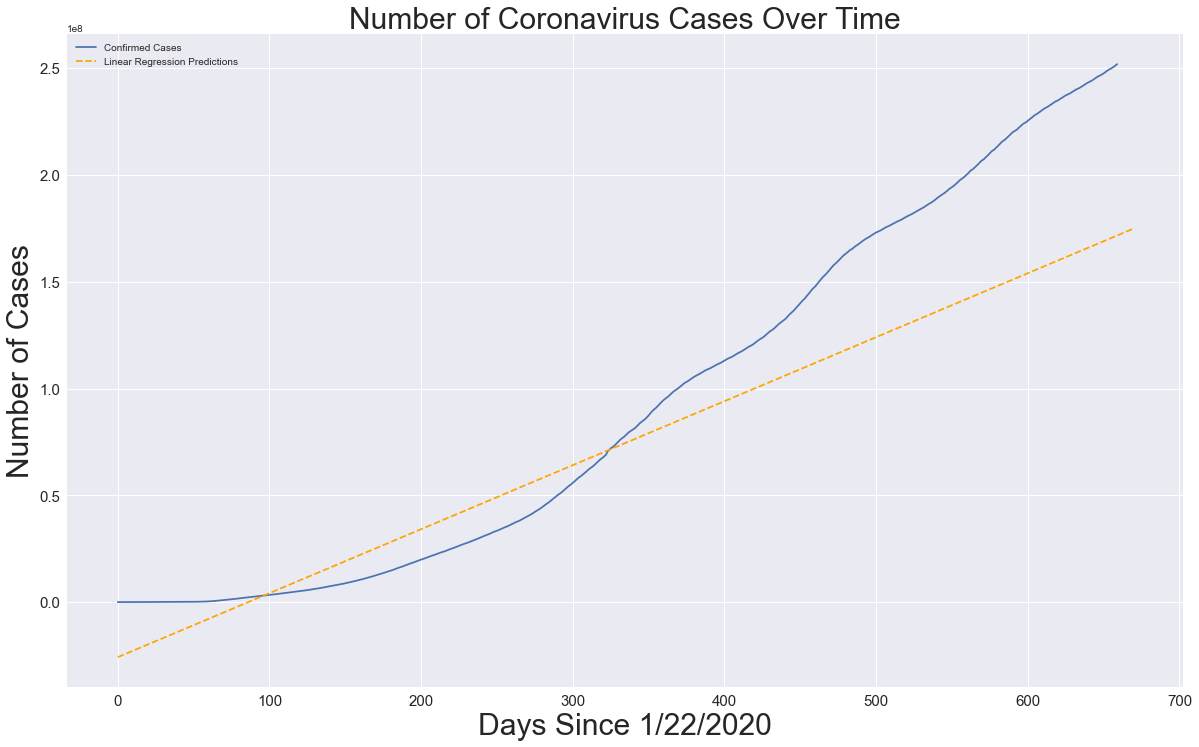

In [67]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [68]:
print('Linear regression future predictions:')
print(linear_pred[-10:])


Linear regression future predictions:
[[1.71994236e+08]
 [1.72293899e+08]
 [1.72593563e+08]
 [1.72893227e+08]
 [1.73192890e+08]
 [1.73492554e+08]
 [1.73792217e+08]
 [1.74091881e+08]
 [1.74391544e+08]
 [1.74691208e+08]]


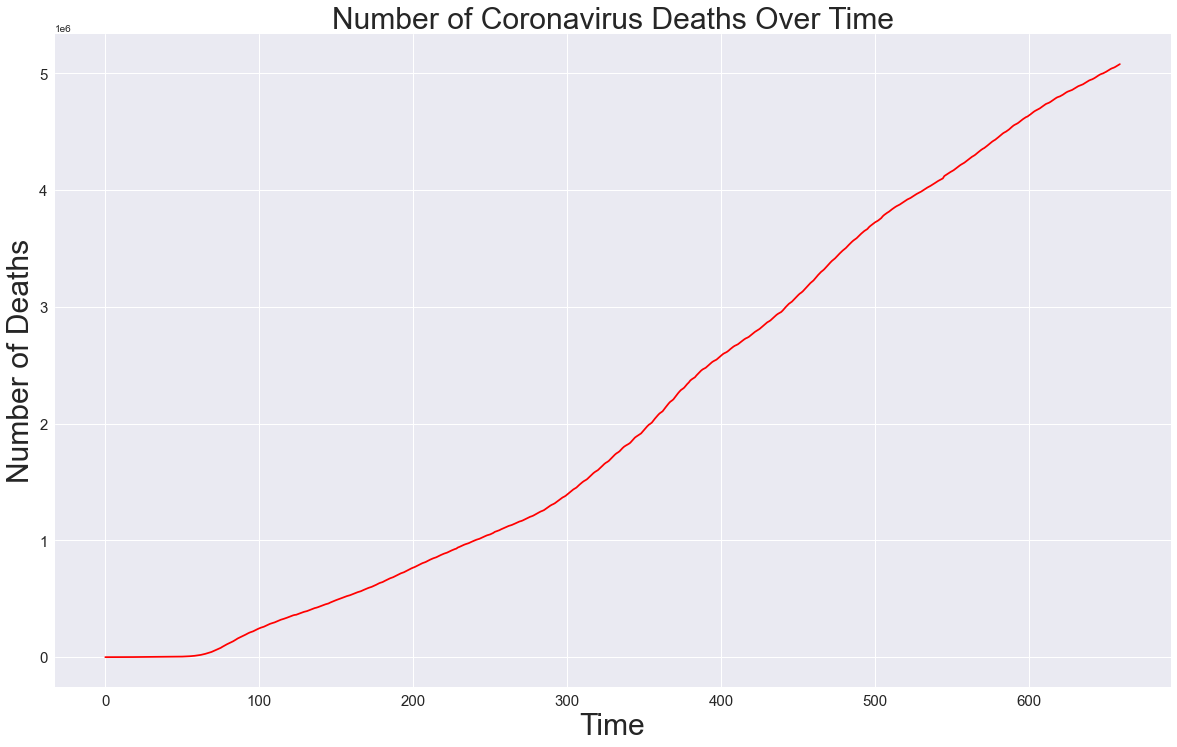

In [69]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

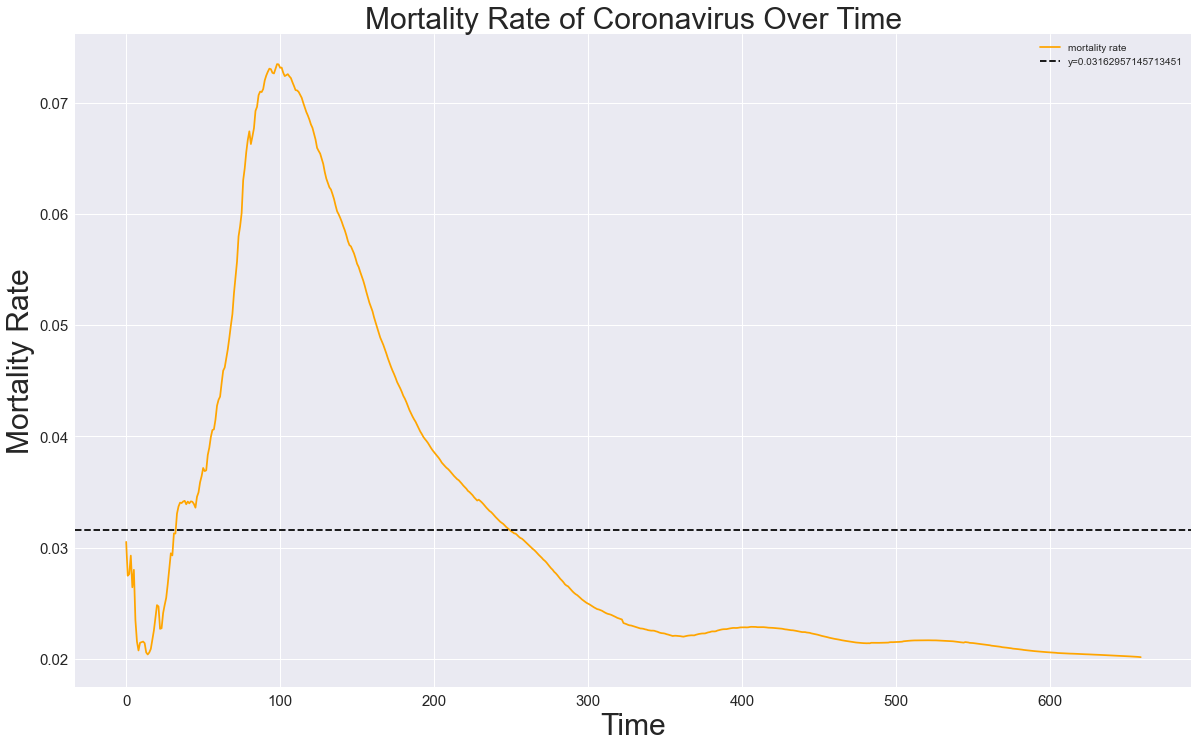

In [70]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

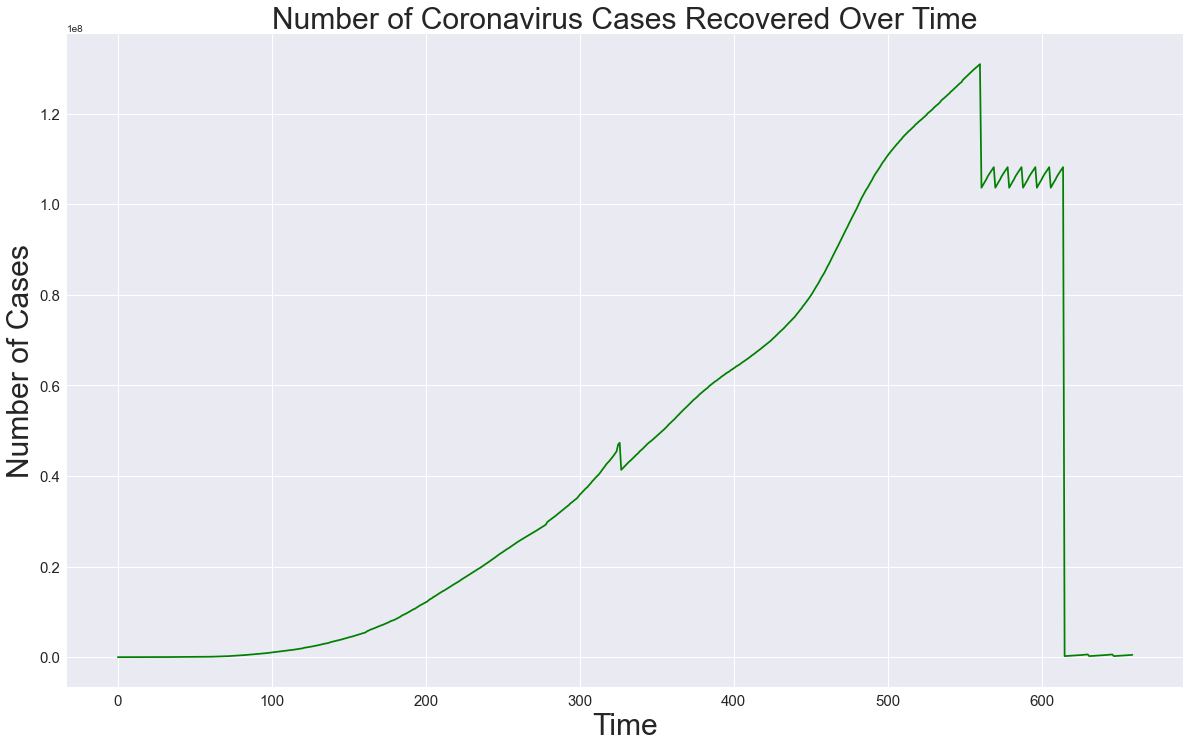

In [71]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

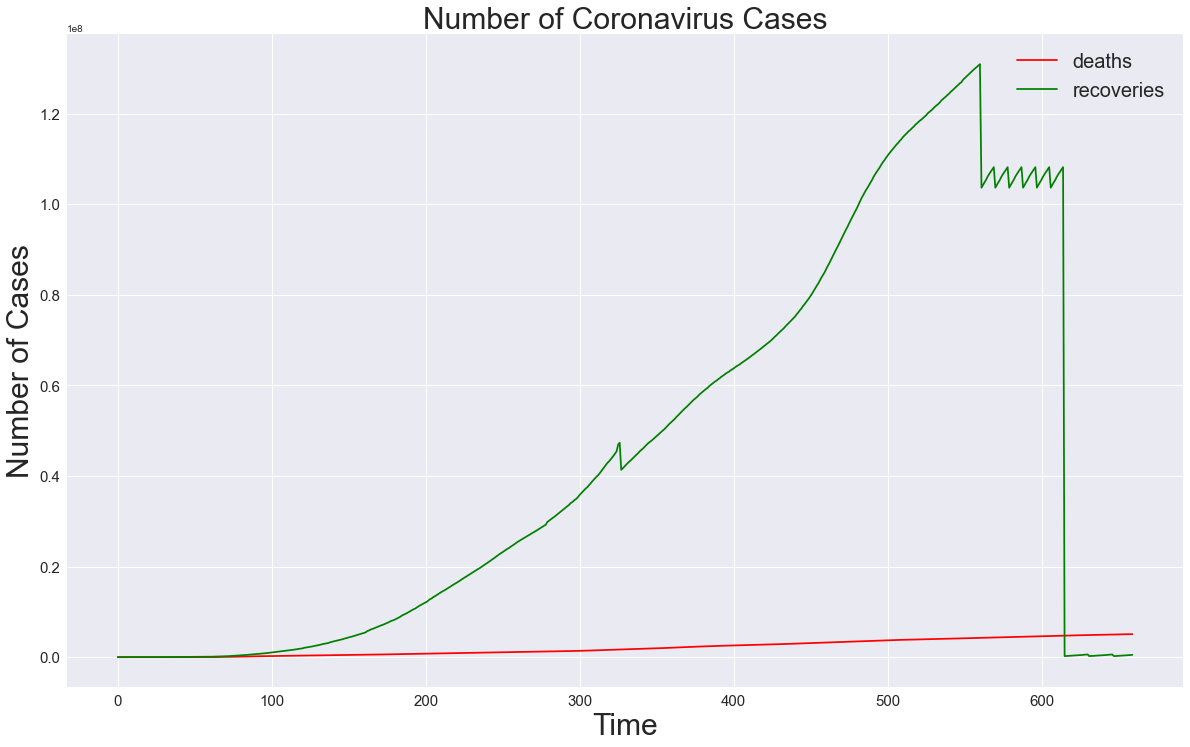

In [72]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['deaths', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

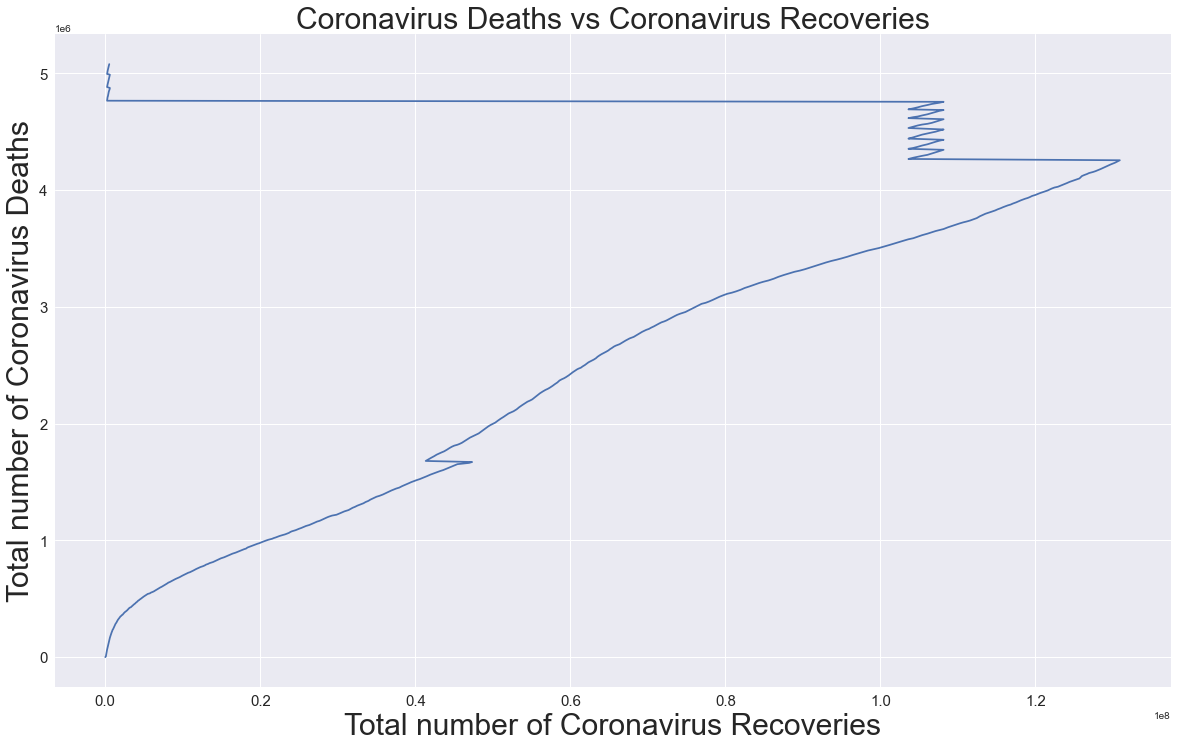

In [73]:
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('Coronavirus Deaths vs Coronavirus Recoveries', size=30)
plt.xlabel('Total number of Coronavirus Recoveries', size=30)
plt.ylabel('Total number of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()